# SWMAL Exercise


## Convolutional Neural Networks (CNNs)


Excercise 9, p.496 2nd./p.535 3rd. [HOML] (slighty modified):

__"9. Build an CNN via the Keras API and try to achieve the highest possible accuracy on MNIST."__

For the journal: 

* write an introduction to CNNs (what are CNNs, what is a convolution layer, etc..), 
* document your experiments towards the end-goal of reaching 'a high accuracy' (what did you try, what work/did not work), 
* document how you use '_generalization_' in your setup (us of simple hold-out/train-test split or k-fold, or etc..),
* produce some sort of '_learning-curve_' that illustrates the drop in cost- or increase in score-function with respect to, say training iteration (for inspiration see fig 4.20, 10-12 or 10.17 in [HOML]),
* document the final CNN setup (layers etc., perhaps as a graph/drawing), 
* discus on your iterations towards the end-goal and other findings you had,
* and, as always, write a conclusion.

If you use a code template from slides, HOML or the internet, then remember to add a reference to the original work in you journal.

Training data shape: (60000, 28, 28), (60000,)
Test data shape: (10000, 28, 28), (10000,)
Training model...
Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.8181 - loss: 0.5754 - val_accuracy: 0.9821 - val_loss: 0.0546
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9798 - loss: 0.0641 - val_accuracy: 0.9863 - val_loss: 0.0460
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9862 - loss: 0.0466 - val_accuracy: 0.9870 - val_loss: 0.0448
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9868 - loss: 0.0430 - val_accuracy: 0.9838 - val_loss: 0.0623
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9897 - loss: 0.0376 - val_accuracy: 0.9873 - val_loss: 0.0535
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9880 - loss: 0.0522 - val_accuracy: 0.9893 - val_loss: 0.0459
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9909 - loss: 0.0413 - val_accuracy: 0.9883 - val_lo

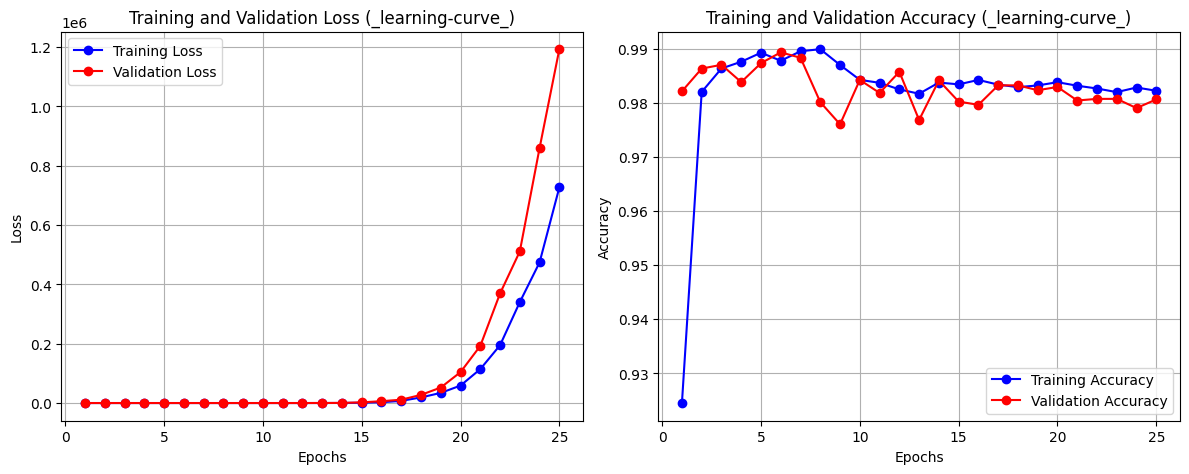

In [ ]:
# TODO: CNN implemetation via Keras..
import keras
import matplotlib.pyplot as plt
import numpy as np
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")
keras.random.SeedGenerator(42)

#What is the split of the dataset?
print(f"Training data shape: {x_train.shape}, {y_train.shape}")
print(f"Test data shape: {x_test.shape}, {y_test.shape}")


# Preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Build a CNN model
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(shape=(28, 28, 1)))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())
#model.add(keras.layers.Dropout(0.5))  
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# --- Train the model AND capture the history ---
print("Training model...")
history = model.fit(x_train, y_train,
                    epochs=25,
                    batch_size=256,
                    validation_data=(x_test, y_test),
                    verbose=1) 

# --- Evaluate the model (as before) ---
print("\nEvaluating model...")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')


# --- Plotting the Learning Curve ---
print("\nPlotting learning curves...")
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, 'bo-', label='Training Loss')
plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss (_learning-curve_)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (_learning-curve_)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()



REVISIONS||
:- | :- |
2021-10-20| CEF, initial version, clone from [HOML].
2021-10-26| CEF, added learning curve item.
2022-01-25| CEF, update to SWMAL F22.
2023-03-08| CEF, updated page no to HOML 3rd. ed., updated to SWMAL F23.
2023-03-15| CEF, removed wording "from scratch", replaced with "via the Keras API" and added comment about references.
2024-09-11| CEF, updated page refefences.